In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
df = pd.read_csv('Ecommerce_Transactions_Dataset.csv')

In [ ]:
df.head()


,Order_ID,Customer_ID,Product_Category,Product_Name,Quantity,Price_Per_Unit,Order_Date,Payment_Method,Customer_Region,Returned,Total_Amount
0,221958,4865,Clothing,Item B,4,273.29,2/2/2023,Bank Transfer,West,No,1093.16
1,771155,3557,Clothing,Item B,3,158.40,4/25/2023,Bank Transfer,East,No,475.20
2,231932,2731,Health,Item A,2,237.44,1/3/2023,PayPal,North,No,474.88
3,465838,1545,Health,Item B,2,72.21,1/4/2023,PayPal,South,No,144.42
4,359178,2587,Books,Item B,4,149.62,12/22/2023,Cash,East,No,598.48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          3000 non-null   int64  
 1   Customer_ID       3000 non-null   int64  
 2   Product_Category  3000 non-null   object 
 3   Product_Name      3000 non-null   object 
 4   Quantity          3000 non-null   int64  
 5   Price_Per_Unit    3000 non-null   float64
 6   Order_Date        3000 non-null   object 
 7   Payment_Method    3000 non-null   object 
 8   Customer_Region   3000 non-null   object 
 9   Returned          3000 non-null   object 
 10  Total_Amount      3000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 257.9+ KB


In [ ]:
# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

#1. BASIC EDA

In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (3000, 11)


In [ ]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Order_ID                     int64
Customer_ID                  int64
Product_Category            object
Product_Name                object
Quantity                     int64
Price_Per_Unit             float64
Order_Date          datetime64[ns]
Payment_Method              object
Customer_Region             object
Returned                    object
Total_Amount               float64
dtype: object


In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Order_ID            0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Price_Per_Unit      0
Order_Date          0
Payment_Method      0
Customer_Region     0
Returned            0
Total_Amount        0
dtype: int64


In [ ]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
             Order_ID  Customer_ID     Quantity  Price_Per_Unit  \
count    3000.000000  3000.000000  3000.000000     3000.000000   
mean   547925.294667  3037.422000     2.516000      153.331223   
min    100126.000000  1000.000000     1.000000        5.050000   
25%    314507.000000  2036.750000     1.000000       82.247500   
50%    551007.500000  3047.000000     3.000000      153.050000   
75%    771221.500000  4015.000000     4.000000      225.762500   
max    999885.000000  4996.000000     4.000000      299.890000   
std    261997.484253  1148.277981     1.130267       84.802279   

                          Order_Date  Total_Amount  
count                           3000   3000.000000  
mean   2023-07-02 21:26:52.799999744    386.168917  
min              2023-01-01 00:00:00      5.330000  
25%              2023-04-05 00:00:00    152.075000  
50%              2023-07-03 00:00:00    294.170000  
75%              2023-09-30 00:00:00    567.865000  
max     

#2. Sales Analysis

In [ ]:
total_revenue = df['Total_Amount'].sum()
print(f"\nTotal Revenue: ${total_revenue:,.2f}")



Total Revenue: $1,158,506.75


In [ ]:
# Revenue by month
df['Month'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total_Amount'].sum().reset_index()

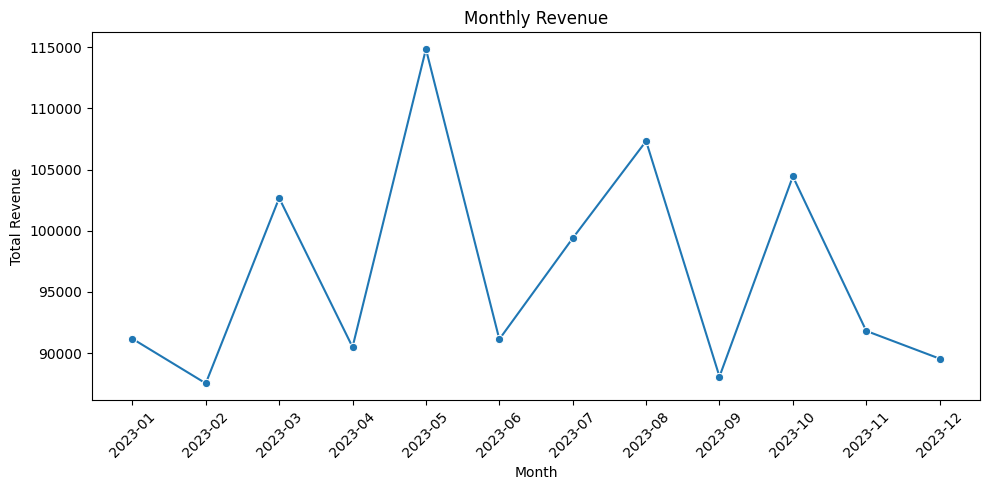

In [ ]:
# Plot Monthly Sales
plt.figure(figsize=(10, 5))
# Convert 'Month' column to string before plotting
# Changed 'Month'.astype(str) to monthly_sales['Month'].astype(str)
sns.lineplot(data=monthly_sales, x=monthly_sales['Month'].astype(str), y='Total_Amount', marker='o')
plt.title("Monthly Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

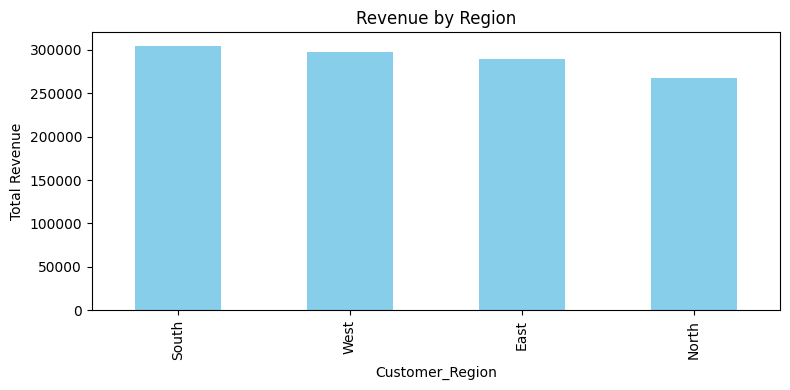

In [ ]:
# Revenue by region
sales_by_region = df.groupby('Customer_Region')['Total_Amount'].sum().sort_values(ascending=False)
sales_by_region.plot(kind='bar', title='Revenue by Region', figsize=(8, 4), color='skyblue')
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# 3. Product Category Performance

In [ ]:
category_perf = df.groupby('Product_Category').agg({
    'Total_Amount': 'sum',
    'Order_ID': 'count',
    'Quantity': 'sum'
}).rename(columns={'Order_ID': 'Total_Orders'}).reset_index()

In [ ]:

print("\nCategory Performance:\n", category_perf)


Category Performance:
   Product_Category  Total_Amount  Total_Orders  Quantity
0            Books     232690.67           606      1518
1         Clothing     240054.62           632      1559
2      Electronics     218921.56           558      1403
3           Health     246752.44           619      1576
4   Home & Kitchen     220087.46           585      1492


<ipython-input-17-43dbe8a2a1ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_perf, x='Product_Category', y='Total_Amount', palette='viridis')


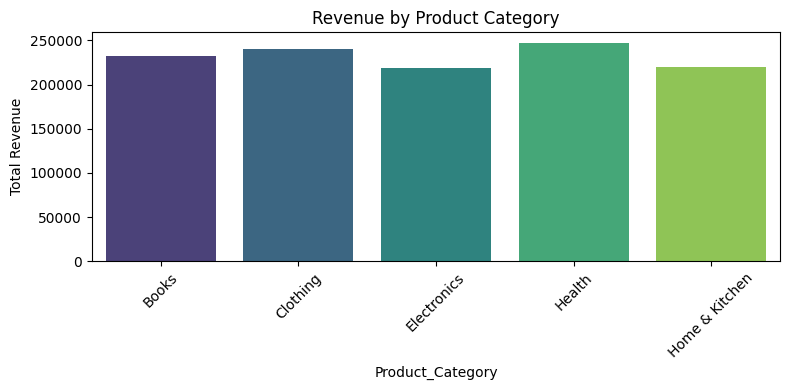

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=category_perf, x='Product_Category', y='Total_Amount', palette='viridis')
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Customer Segmentation


In [ ]:
customer_stats = df.groupby('Customer_ID').agg({
    'Total_Amount': 'sum',
    'Order_ID': 'nunique',
    'Quantity': 'sum'
}).rename(columns={'Order_ID': 'Total_Orders'}).reset_index()

In [ ]:
# Create spending categories
# Calculate max Total_Amount from customer_stats, not df
max_amount = customer_stats['Total_Amount'].max()
# Ensure bins are monotonically increasing
# Changed: Ensure max_amount is greater than the largest bin edge (3000 in this case)
bins = [0, 500, 1500, 3000, max(3000 + 1, max_amount + 1)]
labels = ['Low', 'Moderate', 'High', 'Premium']
customer_stats['Spending_Category'] = pd.cut(customer_stats['Total_Amount'], bins=bins, labels=labels)

print("\nCustomer Segmentation Sample:\n", customer_stats.head())


Customer Segmentation Sample:
    Customer_ID  Total_Amount  Total_Orders  Quantity Spending_Category
0         1000        436.40             1         4               Low
1         1006        618.52             1         4          Moderate
2         1007         98.69             2         3               Low
3         1009        589.84             2         3          Moderate
4         1016        287.84             1         2               Low


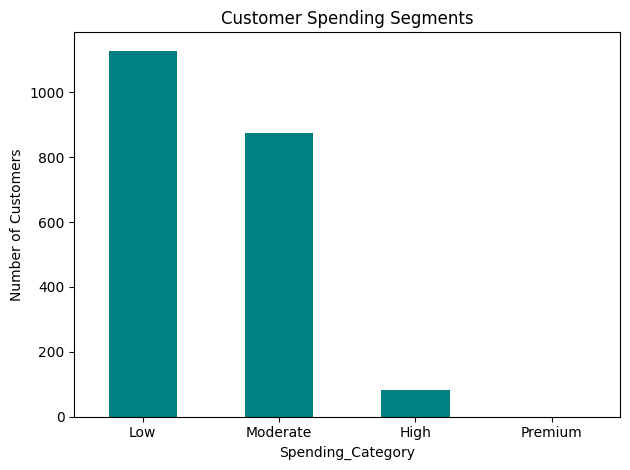

In [ ]:
# Plot customer segmentation
seg_counts = customer_stats['Spending_Category'].value_counts().sort_index()
seg_counts.plot(kind='bar', color='teal', title='Customer Spending Segments')
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()